## Import the dataset


In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X_all_features = spambase.data.features

# only select features that interest us
selected_features = [
    "word_freq_will",
    "word_freq_remove",
    "word_freq_you",
    "word_freq_free",
    "char_freq_!",
    "char_freq_$",
]
X = X_all_features[selected_features]

# define y which contains the information whether the email is spam
y = spambase.data.targets

In [2]:
# print the features
X

,word_freq_will,word_freq_remove,word_freq_you,word_freq_free,char_freq_!,char_freq_$
0,0.64,0.00,1.93,0.32,0.778,0.000
1,0.79,0.21,3.47,0.14,0.372,0.180
2,0.45,0.19,1.36,0.06,0.276,0.184
3,0.31,0.31,3.18,0.31,0.137,0.000
4,0.31,0.31,3.18,0.31,0.135,0.000
...,...,...,...,...,...,...
4596,1.88,0.00,0.62,0.00,0.000,0.000
4597,0.00,0.00,6.00,0.00,0.353,0.000
4598,1.80,0.00,1.50,0.00,0.000,0.000
4599,0.32,0.00,1.93,0.00,0.000,0.000


In [3]:
# print whether spam or not: 1 = spam, 0 = non-spam
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


## Split data into training and test data


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
X_train_spam = X_train[y_train["Class"] == 1]
X_train_nonspam = X_train[y_train["Class"] == 0]
X_test_spam = X_test[y_test["Class"] == 1]
X_test_nonspam = X_test[y_test["Class"] == 0]

n_training = len(X_train)
n_test = len(X_test)

## Exploratory histograms of training data


In [6]:
import matplotlib.pyplot as plt

Define a function to plot histograms.


In [7]:
def show_histogram(feature):
    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the first histogram with spam
    ax1.hist(
        X_train_spam[feature], bins=30, density=True
    )  # density=True so that the area under the histogram sums to 1
    ax1.set_title(f'"{feature}": Spam')

    # Plot the second histogram with non-spam
    ax2.hist(
        X_train_nonspam[feature], bins=30, density=True
    )  # density=True so that the area under the histogram sums to 1
    ax2.set_title(f'"{feature}": Non-Spam')

    plt.tight_layout()
    plt.show()

#### Occurences of "will"


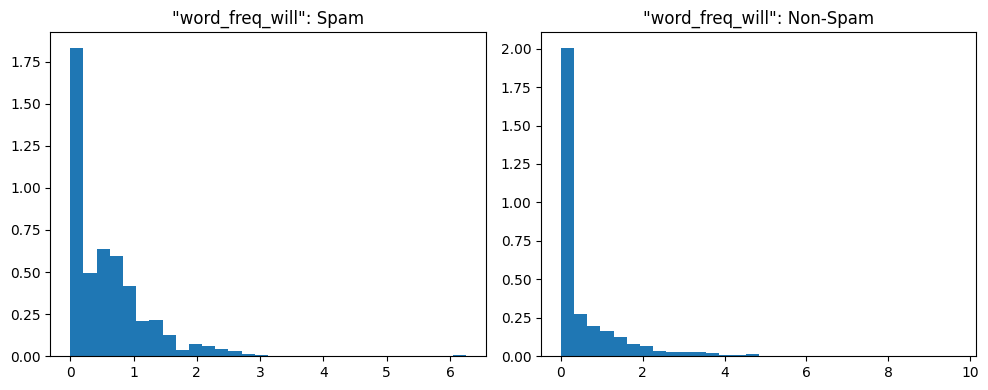

In [8]:
show_histogram("word_freq_will")

#### Occurences of "remove"


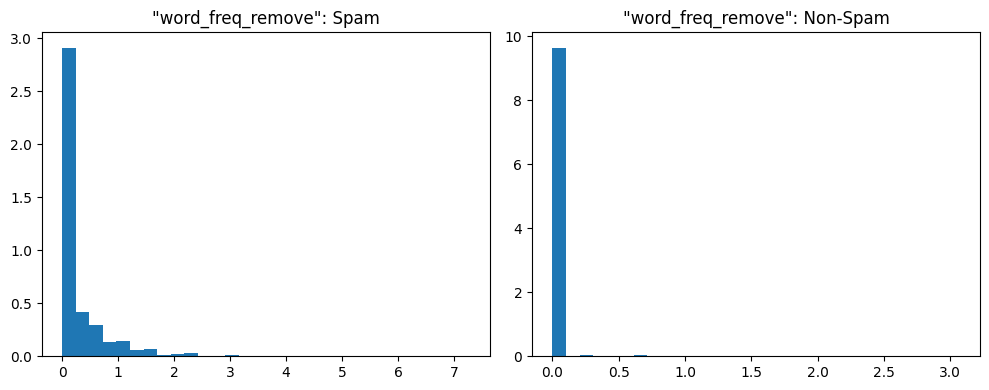

In [9]:
show_histogram("word_freq_remove")

#### Occurences of "you"


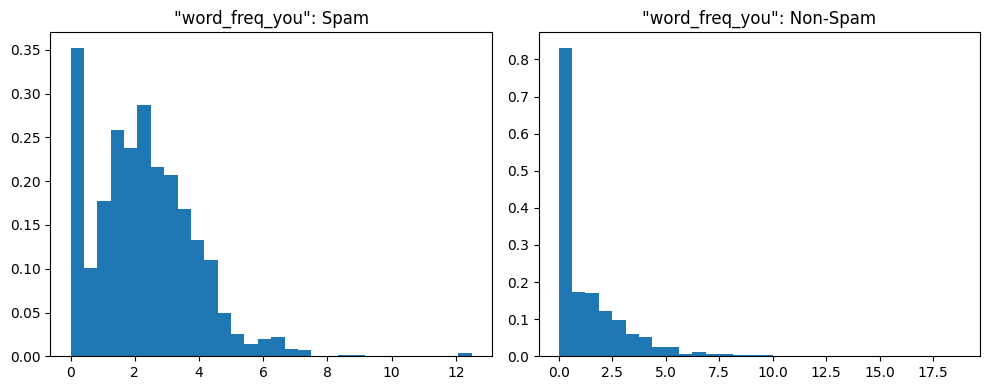

In [10]:
show_histogram("word_freq_you")

#### Occurences of "free"


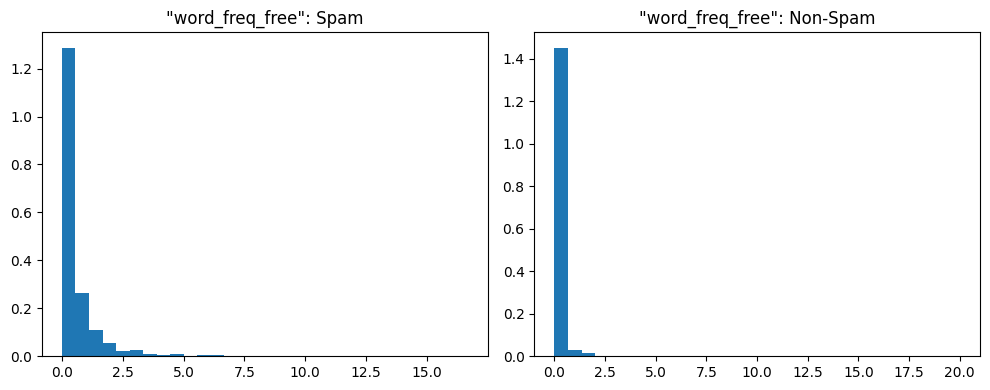

In [11]:
show_histogram("word_freq_free")

#### Occurences of "!"


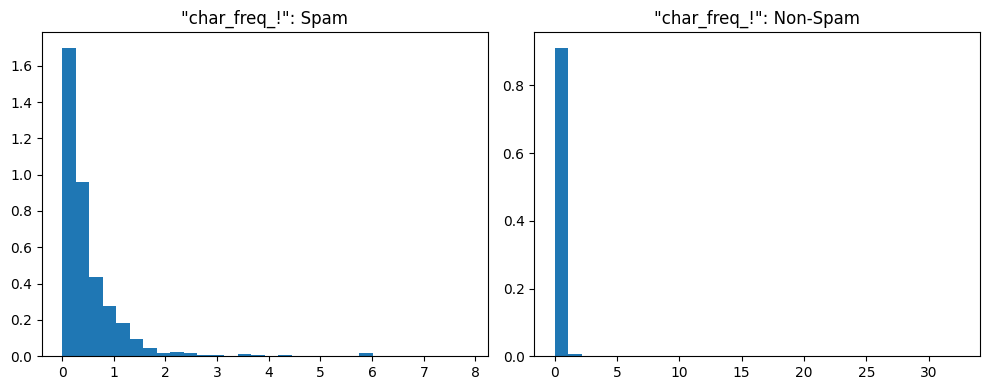

In [12]:
show_histogram("char_freq_!")

#### Occurences of "\$"


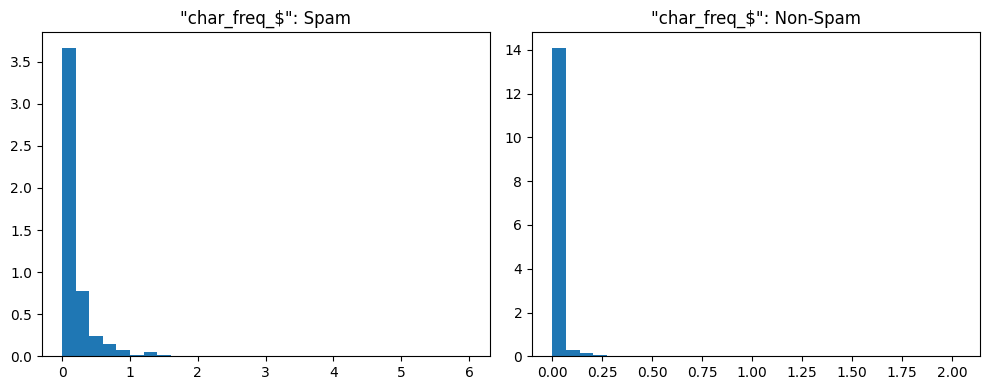

In [13]:
show_histogram("char_freq_$")

# Problem 4.1

We'll use the empirical values $P(S)=0.9$ and $P(S^C)=0.1$ just like in the problem description.


In [14]:
p_S = 0.9
p_Sc = 0.1

## a)

Determine the estimated values $ \hat{p}(E|S) $, $ \hat{p}(E|S^C) $ and $ \hat{p}(S|E) $ for the event $ E = $ "contains at least 3% exclamation marks" analogous to the example above. So should we classify emails with the property $ E $ as spam if we use a threshold value of 98% for sorting?

_Note_: The event $ E $ does not have the exact form "contains a certain word (at least once)" discussed above; however, this does not change the general procedure.


In [15]:
event_threshold = 3  # 3% character count

First we get the amount of spam emails from the training set that contain more than 3% "!" chars of the total char count


In [16]:
spam_mails_filtered = len(X_train_spam[X_train_spam["char_freq_!"] > event_threshold])
spam_mails_filtered

21

Then we get the amount of normal emails from the training set that ontain more than 3% "!" chars of the total char count


In [17]:
normal_mails_filtered = len(
    X_train_nonspam[X_train_nonspam["char_freq_!"] > event_threshold]
)
normal_mails_filtered

10

Then we get the probability $\hat{p}(E|S)$ --> probability that a spam mail contains more than 3% of "!" chars


In [18]:
p_E_S = spam_mails_filtered / len(X_train_spam)
p_E_S

0.014757554462403373

Then we get the probability $\hat{p}(E|S^C)$ --> probability that a normal mail contains more than 3% of "!" chars


In [19]:
p_E_Sc = normal_mails_filtered / len(X_train_nonspam)
p_E_Sc

0.004430660168365086

Using the bayes theorem we can now calculate the probability $\hat{p}(S|E)$ --> probability that any email containing 3% of "!" chars is a spam mail


In [20]:
p_S_E = (p_E_S * p_S) / ((p_E_S * p_S) + (p_E_Sc * p_Sc))
p_S_E

0.967718005548964

No, we should not classify emails with 3% of the character count beeing "!" as spam emails, since the probability that an email containing 3% of "!" characters is at roughly 96.7% and we defined the threshold at 98%.


## b)

Now create the confusion matrix for the training data set with regard to the criterion $E$. How do you assess the result?


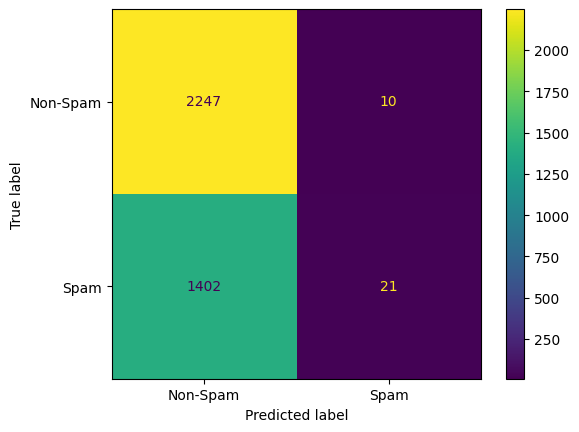

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = (X_train["char_freq_!"] > event_threshold).astype(int)
ConfusionMatrixDisplay.from_predictions(
    y_train, y_pred, display_labels=["Non-Spam", "Spam"]
)
plt.show()

True Positives (21): Correctly identified 21 spam emails.
False Positives (10): Incorrectly identified 10 non-spam emails as spam.
True Negatives (2247): Correctly identified 2247 non-spam emails.
False Negatives (1402): Failed to identify 1402 spam emails, meaning these spam emails slipped through the filter and were treated as non-spam.

The filter has a lot of false negatives, the filter misses thereby a lot of spam mails.


## Some refactoring

Before we continue with the exercises, we will be doing some refactoring to our existing code. This will then help us later on and ease things up.


In [22]:
from IPython.display import display, Math
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    classification_report,
)
import matplotlib.pyplot as plt


def compute_p_S_E(
    conditions: list,
    p_S: float = 0.9,
    p_Sc: float = 0.1,
    test_set: bool = False,
    display_bayes: bool = True,
    display_confusion_matrix: bool = True,
    display_accuracy: bool = True,
    display_confusion_matrix_on_test: bool = True,
) -> tuple[float, float | None]:
    accuracy = None
    spam_filter = X_train_spam.copy()
    nonspam_filter = X_train_nonspam.copy()

    for condition in conditions:
        index, op, threshold = condition
        spam_filter = spam_filter[op(spam_filter[index], threshold)]
        nonspam_filter = nonspam_filter[op(nonspam_filter[index], threshold)]

    spam_mails_filtered = len(spam_filter)
    normal_mails_filtered = len(nonspam_filter)
    p_E_S = spam_mails_filtered / len(X_train_spam)
    p_E_Sc = normal_mails_filtered / len(X_train_nonspam)
    p_S_E = (p_E_S * p_S) / ((p_E_S * p_S) + (p_E_Sc * p_Sc))

    if display_bayes:
        display(Math(r"\hat{p}(E|S) = " + str(p_E_S)))
        display(Math(r"\hat{p}(E|S^C) = " + str(p_E_Sc)))
        display(
            Math(
                r"\hat{p}(S|E) = \frac{\hat{p}(E|S) \cdot \hat{p}(S)}{\hat{p}(E|S) \cdot \hat{p}(S) + \hat{p}(E|S^C) \cdot \hat{p}(S^C)} = "
                + r"\frac{"
                + str(p_E_S)
                + r" \cdot "
                + str(p_S)
                + "}{"
                + str(p_E_S)
                + r" \cdot "
                + str(p_S)
                + " + "
                + str(p_E_Sc)
                + r" \cdot "
                + str(p_Sc)
                + "}"
                + " = "
                + str(p_S_E)
            )
        )

    if display_confusion_matrix:
        mask = pd.Series([True] * len(X_train))
        for condition in conditions:
            index, op, threshold = condition
            mask &= op(X_train[index], threshold)

        y_pred = mask.astype(int)
        [TN, FP], [FN, TP] = confusion_matrix(y_train, y_pred)
        ConfusionMatrixDisplay.from_predictions(
            y_train, y_pred, display_labels=["Non-Spam", "Spam"]
        )
        plt.show()
        display(f"True Positives ({TP}): Correctly identified {TP} spam emails")
        display(f"False Positives ({FP}): Failed to identify {FP} non-spam emails")
        display(f"True Negatives ({TN}): Correctly identified {TN} non-spam emails")
        display(f"False Negatives ({FN}): Failed to identify {FN} spam emails")

    if test_set:
        mask_test = pd.Series([True] * len(X_test))
        for condition in conditions:
            index, op, threshold = condition
            mask_test &= op(X_test[index], threshold)

        y_pred_test = mask_test.astype(int)

        if display_confusion_matrix_on_test:
            [TN, FP], [FN, TP] = confusion_matrix(y_test, y_pred_test)
            ConfusionMatrixDisplay.from_predictions(
                y_test, y_pred_test, display_labels=["Non-Spam", "Spam"]
            )
            plt.show()
            display(f"True Positives ({TP}): Correctly identified {TP} spam emails")
            display(f"False Positives ({FP}): Failed to identify {FP} non-spam emails")
            display(f"True Negatives ({TN}): Correctly identified {TN} non-spam emails")
            display(f"False Negatives ({FN}): Failed to identify {FN} spam emails")

        accuracy = accuracy_score(y_test, y_pred_test)

        if display_accuracy:
            display(f"Test Accuracy: {accuracy}")
            display(f"Classification Report on Test Data:")
            print(classification_report(y_test, y_pred_test))

    return p_S_E, accuracy

This function allows us now to chain different events together and do all the evaluation steps directly in the function and output it to the cell.


## c)

Now vary the percentage limit (i.e. the 3%) in the event $E$ and try to improve your results from a) and b) this way. (Continue to work on the training data set.)

We want the outputted threshold to be greater than 98%. To achieve this we run the function over a range of evenly spaced floating point values. Then filter out all outputted values that are under 98% and test again with the found event threshold values that produce a threshold of at least 98%.


In [23]:
import operator
import numpy as np

p_S_E_values = []
for i in np.linspace(0, 100, num=1_000):
    try:
        p_S_E, _ = compute_p_S_E(
            [("char_freq_!", operator.gt, i)],
            display_bayes=False,
            display_confusion_matrix=False,
        )
        p_S_E_values.append((i, p_S_E))
    except:
        continue
[(et, t) for (et, t) in p_S_E_values if t >= 0.98]

[(np.float64(0.3003003003003003), 0.9825152668874857),
 (np.float64(0.4004004004004004), 0.9847838052393962),
 (np.float64(0.5005005005005005), 0.9859746390646664),
 (np.float64(0.6006006006006006), 0.9857069006067958),
 (np.float64(0.7007007007007008), 0.9866156248236423),
 (np.float64(0.8008008008008008), 0.988760563204359),
 (np.float64(0.9009009009009009), 0.9870152060332298),
 (np.float64(1.001001001001001), 0.9866476057480813),
 (np.float64(1.1011011011011012), 0.98672459329651),
 (np.float64(1.2012012012012012), 0.9869653094589024),
 (np.float64(1.3013013013013013), 0.9853577150920931),
 (np.float64(1.4014014014014016), 0.9843282283519199),
 (np.float64(1.5015015015015016), 0.9830198022755613),
 (np.float64(1.6016016016016017), 0.9811537421792043),
 (np.float64(1.9019019019019021), 0.9801637171557737)]

Interestingly the lower the threshold gets higher the lower the event threshold gets. However this does make sense if we look at the context of the exclamation mark. Let's take a look again at the histogram of the character frequency of the exclamation mark.


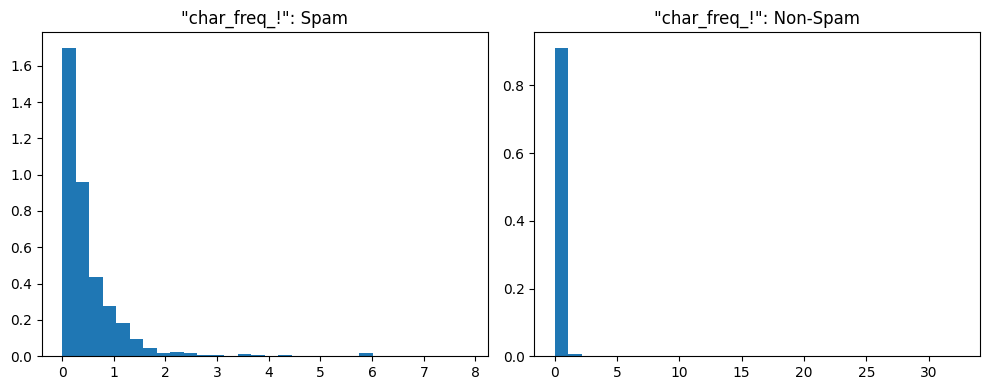

In [24]:
show_histogram("char_freq_!")

## d)

We can see that most of the emails labeled as spam have an event threshold under 3%, so we know that our bayesian filter works properly, however only filtering on exclamation marks is not meaningful. Let's run the function against the test set with the highest threshold from our computed values.


0.8008008008008008 0.988760563204359


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

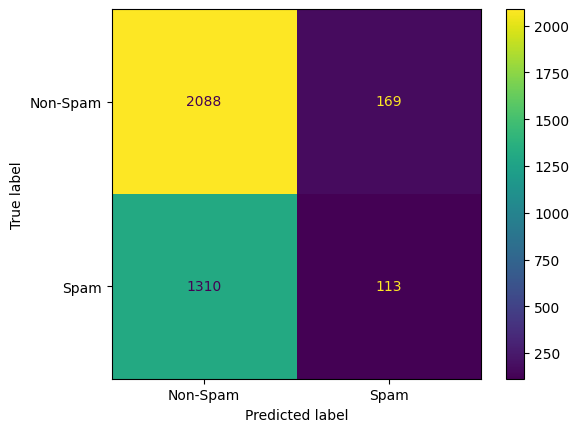

'True Positives (113): Correctly identified 113 spam emails'

'False Positives (169): Failed to identify 169 non-spam emails'

'True Negatives (2088): Correctly identified 2088 non-spam emails'

'False Negatives (1310): Failed to identify 1310 spam emails'

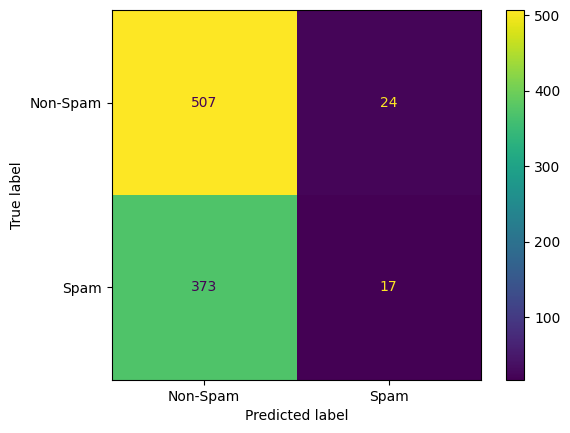

'True Positives (17): Correctly identified 17 spam emails'

'False Positives (24): Failed to identify 24 non-spam emails'

'True Negatives (507): Correctly identified 507 non-spam emails'

'False Negatives (373): Failed to identify 373 spam emails'

'Test Accuracy: 0.5689467969598263'

'Classification Report on Test Data:'

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       531
           1       0.41      0.04      0.08       390

    accuracy                           0.57       921
   macro avg       0.50      0.50      0.40       921
weighted avg       0.51      0.57      0.45       921



(0.988760563204359, 0.5689467969598263)

In [25]:
event_threshold, threshold = max(p_S_E_values, key=operator.itemgetter(1))
print(event_threshold, threshold)
compute_p_S_E([("char_freq_!", operator.gt, event_threshold)], test_set=True)

As we can see the accuracy is only at around 56%, but maybe the highest threshold does not produce the highest accuracy, let's test this by running the function again over the range of floating point values.

In [26]:
p_S_E_values = []
for i in np.linspace(0, 100, num=1_000):
    try:
        p_S_E = compute_p_S_E(
            [("char_freq_!", operator.gt, i)],
            test_set=True,
            display_bayes=False,
            display_confusion_matrix=False,
            display_accuracy=False,
            display_confusion_matrix_on_test=False,
        )
        p_S_E_values.append((i, *p_S_E))
    except:
        continue

event_threshold_1, highest_threshold, accuracy = max(p_S_E_values, key=operator.itemgetter(1))
event_threshold_2, threshold, highest_accuracy = max(p_S_E_values, key=operator.itemgetter(2))

print(event_threshold_1, highest_threshold, accuracy)
print(event_threshold_2, threshold, highest_accuracy)

0.8008008008008008 0.988760563204359 0.5689467969598263
1.001001001001001 0.9866476057480813 0.5776330076004343


As suspected the highest threshold does not produce the highest accuracy. The highest accuracy we can achieve for only the exclamation mark filter is at 57%.

## e)

Now replace the estimates $0.9$ and $0.1$ for $P(S)$ and $P(S^C)$ with 0.5 ich each case and repeat the previous steps. What do you find? Do you still get meaningful results?

Let's use for this the previous found event threshold values for the highest threshold and highest accuracy.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

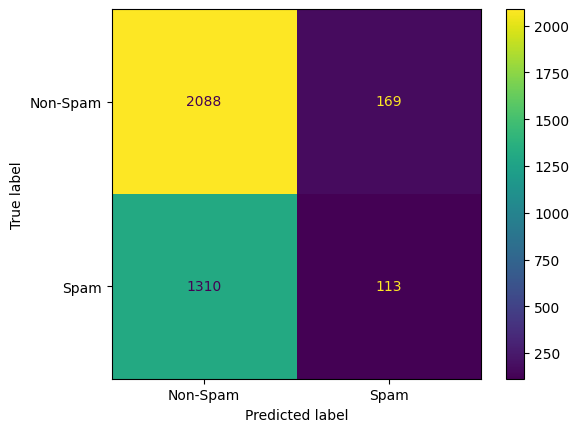

'True Positives (113): Correctly identified 113 spam emails'

'False Positives (169): Failed to identify 169 non-spam emails'

'True Negatives (2088): Correctly identified 2088 non-spam emails'

'False Negatives (1310): Failed to identify 1310 spam emails'

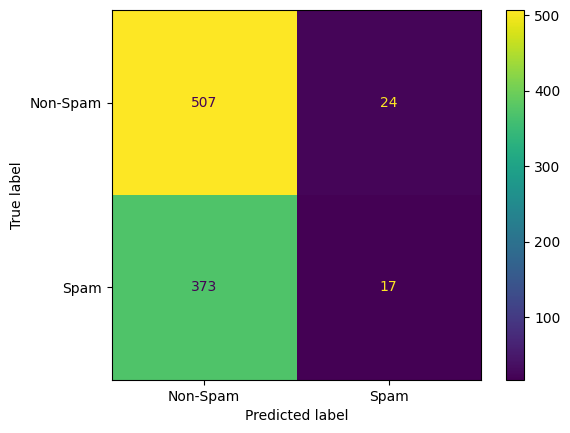

'True Positives (17): Correctly identified 17 spam emails'

'False Positives (24): Failed to identify 24 non-spam emails'

'True Negatives (507): Correctly identified 507 non-spam emails'

'False Negatives (373): Failed to identify 373 spam emails'

'Test Accuracy: 0.5689467969598263'

'Classification Report on Test Data:'

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       531
           1       0.41      0.04      0.08       390

    accuracy                           0.57       921
   macro avg       0.50      0.50      0.40       921
weighted avg       0.51      0.57      0.45       921



(0.9822663744793917, 0.5689467969598263)

In [27]:
compute_p_S_E([("char_freq_!", operator.gt, event_threshold_1)], test_set=True, p_S=0.85, p_Sc=0.15)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

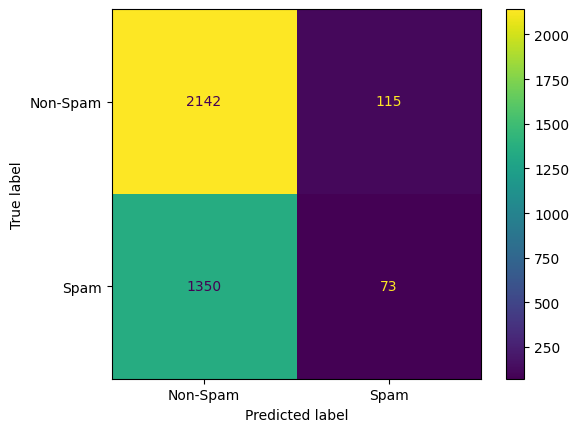

'True Positives (73): Correctly identified 73 spam emails'

'False Positives (115): Failed to identify 115 non-spam emails'

'True Negatives (2142): Correctly identified 2142 non-spam emails'

'False Negatives (1350): Failed to identify 1350 spam emails'

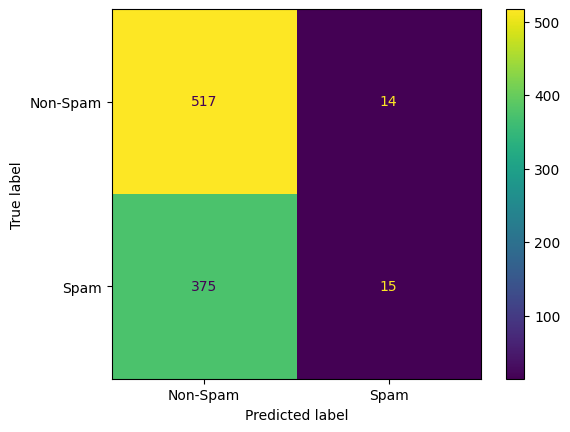

'True Positives (15): Correctly identified 15 spam emails'

'False Positives (14): Failed to identify 14 non-spam emails'

'True Negatives (517): Correctly identified 517 non-spam emails'

'False Negatives (375): Failed to identify 375 spam emails'

'Test Accuracy: 0.5776330076004343'

'Classification Report on Test Data:'

              precision    recall  f1-score   support

           0       0.58      0.97      0.73       531
           1       0.52      0.04      0.07       390

    accuracy                           0.58       921
   macro avg       0.55      0.51      0.40       921
weighted avg       0.55      0.58      0.45       921



(0.9789585233013777, 0.5776330076004343)

In [28]:
compute_p_S_E([("char_freq_!", operator.gt, event_threshold_2)], test_set=True, p_S=0.85, p_Sc=0.15)

The results stay about the same, let's see what happens when we put $P(S)=0.6$ and $P(S^C)=0.4$ (60% mails are spam)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

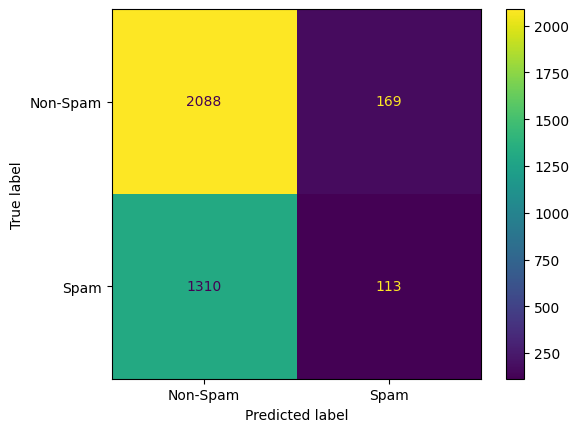

'True Positives (113): Correctly identified 113 spam emails'

'False Positives (169): Failed to identify 169 non-spam emails'

'True Negatives (2088): Correctly identified 2088 non-spam emails'

'False Negatives (1310): Failed to identify 1310 spam emails'

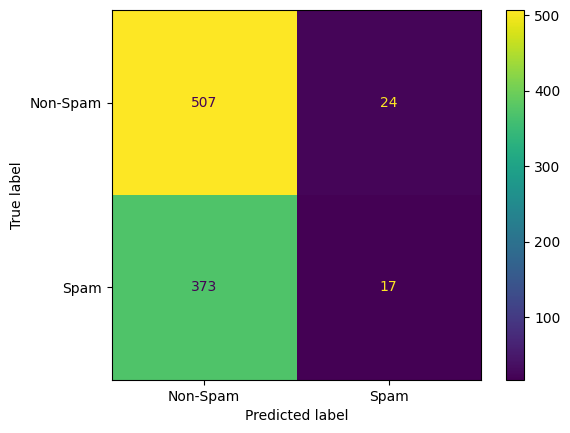

'True Positives (17): Correctly identified 17 spam emails'

'False Positives (24): Failed to identify 24 non-spam emails'

'True Negatives (507): Correctly identified 507 non-spam emails'

'False Negatives (373): Failed to identify 373 spam emails'

'Test Accuracy: 0.5689467969598263'

'Classification Report on Test Data:'

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       531
           1       0.41      0.04      0.08       390

    accuracy                           0.57       921
   macro avg       0.50      0.50      0.40       921
weighted avg       0.51      0.57      0.45       921



(0.9361514859187152, 0.5689467969598263)

In [29]:
compute_p_S_E([("char_freq_!", operator.gt, event_threshold_1)], test_set=True, p_S=0.6, p_Sc=0.4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

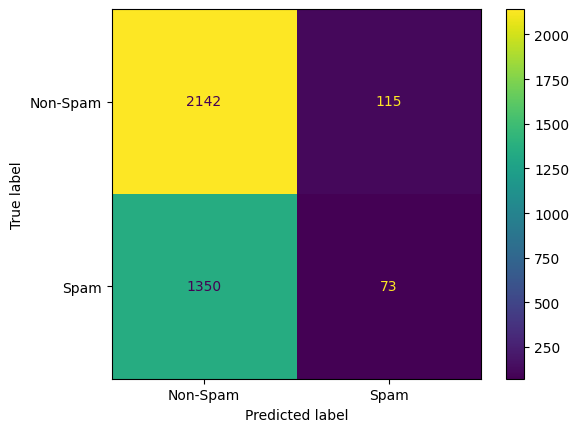

'True Positives (73): Correctly identified 73 spam emails'

'False Positives (115): Failed to identify 115 non-spam emails'

'True Negatives (2142): Correctly identified 2142 non-spam emails'

'False Negatives (1350): Failed to identify 1350 spam emails'

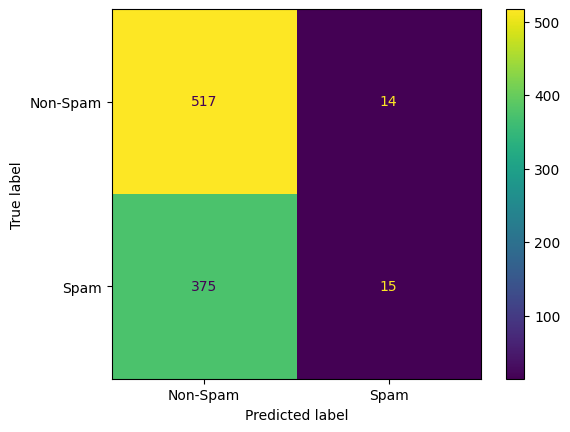

'True Positives (15): Correctly identified 15 spam emails'

'False Positives (14): Failed to identify 14 non-spam emails'

'True Negatives (517): Correctly identified 517 non-spam emails'

'False Negatives (375): Failed to identify 375 spam emails'

'Test Accuracy: 0.5776330076004343'

'Classification Report on Test Data:'

              precision    recall  f1-score   support

           0       0.58      0.97      0.73       531
           1       0.52      0.04      0.07       390

    accuracy                           0.58       921
   macro avg       0.55      0.51      0.40       921
weighted avg       0.55      0.58      0.45       921



(0.9248994924173043, 0.5776330076004343)

In [30]:
compute_p_S_E([("char_freq_!", operator.gt, event_threshold_2)], test_set=True, p_S=0.6, p_Sc=0.4)

The only noticeable change is the threshold, however the accuracy stays the same.

## f)

Now try to further improve the spam filter yourself by defining and testing other criteria E.
These can and should now include several columns of the data set,
e.g. in the form „contains at least 3% exclamation marks and at least 1% dollar signs“.

Let's try to find some condition combinations from our histograms that make sense to train the filter to. To find these combinations lets make a histogram function that displays with a combination of occurrences.

In [31]:
def show_combined_histograms(conditions):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

    features = X.columns.values
    for feature in features:
        ax1.hist(
            X_train_spam[feature],
            bins=30,
            density=True,
            alpha=0.5,
            label=f"{feature}",
        )
    ax1.set_title("Combined Features: Spam")
    ax1.legend()

    for feature in features:
        ax2.hist(
            X_train_nonspam[feature],
            bins=30,
            density=True,
            alpha=0.5,
            label=f"{feature}",
        )
    ax2.set_title("Combined Features: Non-Spam")
    ax2.legend()

    spam_filter = X_train_spam.copy()
    nonspam_filter = X_train_nonspam.copy()

    for condition in conditions:
        feature, op, threshold = condition
        spam_filter = spam_filter[op(spam_filter[feature], threshold)]
        nonspam_filter = nonspam_filter[op(nonspam_filter[feature], threshold)]

    for condition in conditions:
        feature, op, threshold = condition
        ax3.hist(
            spam_filter[feature],
            bins=30,
            density=True,
            alpha=0.5,
            label=f"{feature} {op.__name__} {threshold}",
        )
    ax3.set_title("Combined Features: Spam")
    ax3.legend()

    for condition in conditions:
        feature, op, threshold = condition
        ax4.hist(
            nonspam_filter[feature],
            bins=30,
            density=True,
            alpha=0.5,
            label=f"{feature} {op.__name__} {threshold}",
        )
    ax4.set_title("Combined Features: Non-Spam")
    ax4.legend()

    plt.tight_layout()
    plt.show()

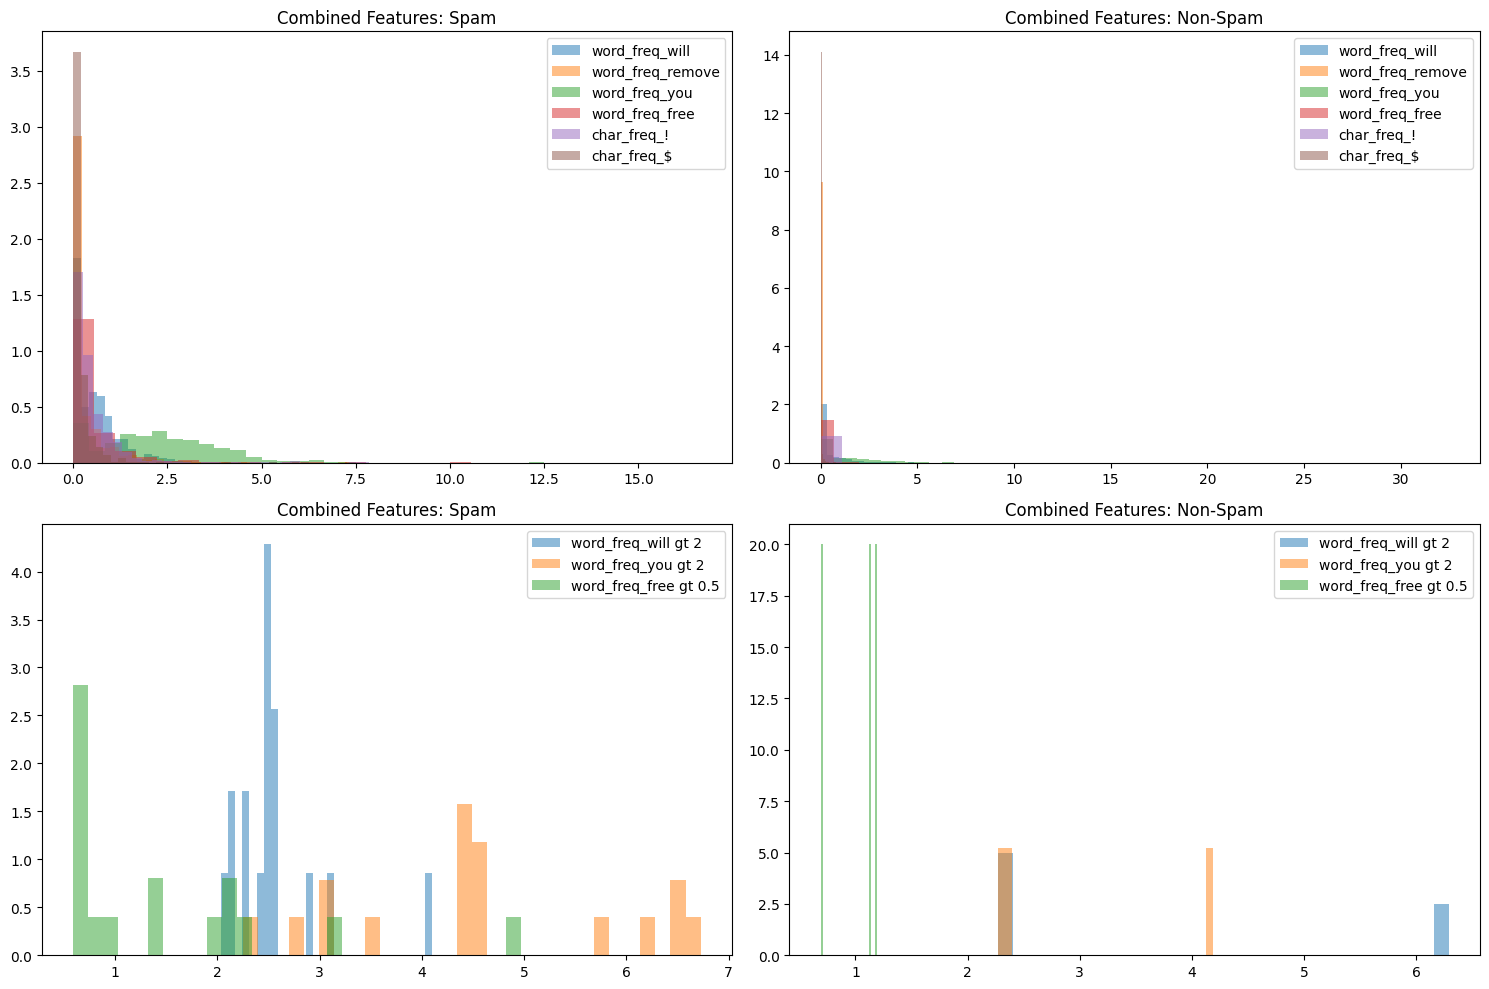

In [32]:
conditions = [
    ("word_freq_will", operator.gt, 2),
    ("word_freq_you", operator.gt, 2),
    ("word_freq_free", operator.gt, 0.5),
]
show_combined_histograms(conditions)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

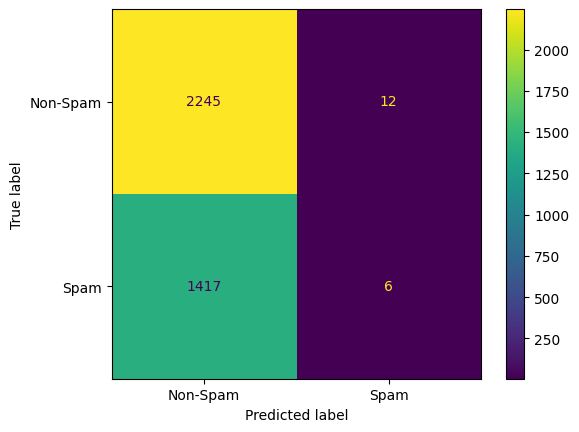

'True Positives (6): Correctly identified 6 spam emails'

'False Positives (12): Failed to identify 12 non-spam emails'

'True Negatives (2245): Correctly identified 2245 non-spam emails'

'False Negatives (1417): Failed to identify 1417 spam emails'

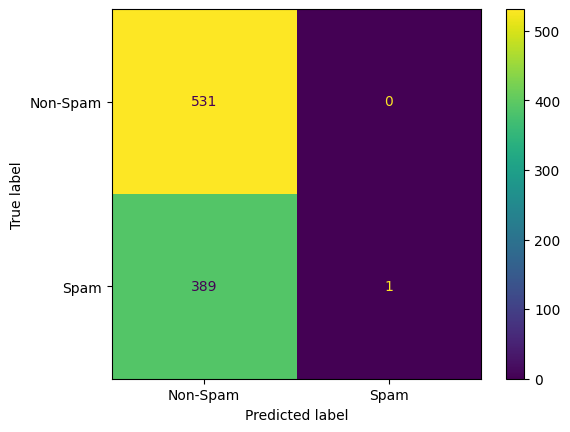

'True Positives (1): Correctly identified 1 spam emails'

'False Positives (0): Failed to identify 0 non-spam emails'

'True Negatives (531): Correctly identified 531 non-spam emails'

'False Negatives (389): Failed to identify 389 spam emails'

'Test Accuracy: 0.5776330076004343'

'Classification Report on Test Data:'

              precision    recall  f1-score   support

           0       0.58      1.00      0.73       531
           1       1.00      0.00      0.01       390

    accuracy                           0.58       921
   macro avg       0.79      0.50      0.37       921
weighted avg       0.76      0.58      0.42       921



(0.9877885523041277, 0.5776330076004343)

In [33]:
compute_p_S_E(conditions, test_set=True)

Finding an optimal combination of events can be quite tricky. To improve the accuracy the computation of the probability might be improved and a lot of hyperparameter tuning needs to be done, however this computation of combined event shows that it indeed impacts the resulting accuracy.